# Extensive Application of Machine Learning Models for Revealing Correlations and Studying Characteristics of Migraines

### Project Overview:
- This comprehensive notebook analyzes migraine patterns using advanced machine learning techniques.
- 10 different algorithms will be implemented, while performing extensive data analysis, and representing key findings on stunning visualization elements.


### Objectives:
- Extended Data Analysis: Going more in depth into migraine patterns and relationships
- Model Training: Training and comparing 10 different ML algorithms
- Visualization: Creating publication-ready plots, diagrams, graphs, overall appealing and professional representation of medical data
- Optimization: Hyperparameter tuning and model improvement
- Interpretability Understanding what drives, and essentially what is behind predictions 

### Dataset:
- Source: Collection of clinical migraine data
- Features: 23 clinical and demographic variables
- Target: Migraine type classifications-> 7 distinct classes
- Size: 400 patient records

In [31]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Data preprocessing libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE, SelectKBest, f_classif
# Machine Learning models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                            roc_auc_score, confusion_matrix, classification_report,
                            roc_curve, auc, precision_recall_curve)

# Visualization enhancements
from sklearn.inspection import permutation_importance
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set up plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("viridis", n_colors=8)
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12


Data Loading and Initial Exploration

In [32]:
filepath = "C://Users//nyolc//Downloads//migraine_data.csv"

In [33]:
def load_and_explore_data(file_path):
    df = pd.read_csv(filepath)
    print("=" * 50)
    print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    # Data types breakdown
    print(f"\n DATA TYPES BREAKDOWN:")
    dtype_counts = df.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"  {dtype}: {count} columns")
    
    # Missing values analysis
    print(f"\n MISSING VALUES ANALYSIS:")
    missing_data = df.isnull().sum()
    if missing_data.sum() == 0:
        print("  No missing values found!")
    else:
        missing_percent = (missing_data / len(df)) * 100
        missing_df = pd.DataFrame({
            'Missing Count': missing_data[missing_data > 0],
            'Percentage': missing_percent[missing_data > 0]
        }).sort_values('Missing Count', ascending=False)
        print(missing_df)
    
    # Basic statistics
    print(f"\n SUMMARY STATISTICS:")
    print(df.describe())
    
    # Target variable analysis
    if 'Type' in df.columns:
        print(f"\n TARGET VARIABLE ANALYSIS:")
        target_counts = df['Type'].value_counts()
        print(target_counts)
        print(f"\n Class distribution:")
        for class_name, count in target_counts.items():
            percentage = (count / len(df)) * 100
            print(f"   • {class_name}: {count} ({percentage:.1f}%)")
    
    return df

In [34]:
import sys
sys.path.append('../src')
from data_utils import load_migraine_data, check_missing_values, remove_duplicates, detect_outliers

df = load_migraine_data('C://Users//nyolc//Downloads//migraine_data.csv')
check_missing_values(df)
df_clean = remove_duplicates(df)
outliers, lb, ub = detect_outliers(df_clean, 'Age')

# Additional exploration
df_explored = load_and_explore_data('C://Users//nyolc//Downloads//migraine_data.csv')


Dataset shape: (400, 24)
No missing values found in the dataset
Number of duplicate rows: 6
Duplicate rows:
     Age  Duration  Frequency  Location  Character  Intensity  Nausea  Vomit  \
94    28         1          5         1          1          2       1      0   
118   28         1          5         1          1          2       1      0   
169   31         1          1         1          1          2       1      1   
200   50         1          1         1          1          3       1      0   
280   22         1          1         1          1          2       1      0   
281   35         1          1         1          1          3       1      0   

     Phonophobia  Photophobia  ...  Vertigo  Tinnitus  Hypoacusis  Diplopia  \
94             1            1  ...        0         0           0         0   
118            1            1  ...        0         0           0         0   
169            1            1  ...        0         0           0         0   
200            

### Advanced Exploratory Data Analysis (EDA)

In [35]:
def create_comprehensive_eda(df):
    #  Target Distribution with enhanced styling
    plt.subplot(4, 4, 1)
    target_counts = df['Type'].value_counts()
    colors = sns.color_palette("viridis", len(target_counts))
    wedges, texts, autotexts = plt.pie(target_counts.values, labels=target_counts.index, 
                                        autopct='%1.1f%%', colors=colors, startangle=90)
    plt.setp(autotexts, size=8, weight="bold")
    plt.title(' Migraine Type Distribution', fontsize=14, fontweight='bold', pad=20)
    
    # Univariate Analysis
    plt.figure(figsize=(14, 8))
    sns.countplot(data=df, x='Type', order=df['Type'].value_counts().index)
    plt.title('Distribution of Migraine Types')
    plt.xlabel('Migraine Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Age Distribution
    plt.figure(figsize=(14, 8))
    sns.histplot(df['Age'], bins=30, kde=True)
    plt.title('Age Distribution of Patients')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

    #Intensity vs Type
    plt.subplot(4, 4, 3)
    sns.boxplot(data=df, y='Type', x='Intensity', palette='viridis')
    plt.title(' Intensity by Migraine Type', fontsize=14, fontweight='bold')
    plt.xlabel('Intensity Level')
    plt.ylabel('Migraine Type')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    # Correlation Heatmap
    plt.subplot(4, 4, 4)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    corr_matrix = df[numeric_cols].corr()
    mask = np.triu(np.ones_like(corr_matrix), k=1)
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0, 
                square=True, fmt='.2f', cbar_kws={"shrink": .8})
    plt.title(' Feature Correlations', fontsize=14, fontweight='bold')
    # 5. Duration patterns
    plt.subplot(4, 4, 5)
    duration_counts = df['Duration'].value_counts().sort_index()
    sns.barplot(x=duration_counts.index, y=duration_counts.values, palette='plasma')
    plt.title('⏱ Duration Patterns', fontsize=14, fontweight='bold')
    plt.xlabel('Duration Category')
    plt.ylabel('Count')
    
    # 6. Frequency analysis
    plt.subplot(4, 4, 6)
    sns.violinplot(data=df, x='Type', y='Frequency', palette='Set2')
    plt.xticks(rotation=45)
    plt.title(' Frequency by Type', fontsize=14, fontweight='bold')
    
    # 7. Symptom prevalence
    plt.subplot(4, 4, 7)
    symptom_cols = ['Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory']
    symptom_prevalence = df[symptom_cols].mean().sort_values(ascending=True)
    sns.barplot(x=symptom_prevalence.values, y=symptom_prevalence.index, palette='magma')
    plt.title(' Symptom Prevalence', fontsize=14, fontweight='bold')
    plt.xlabel('Prevalence Rate')
    
    # 8. Age vs Intensity scatter
    plt.subplot(4, 4, 8)
    scatter = plt.scatter(df['Age'], df['Intensity'], c=df['Frequency'], 
                            cmap='viridis', alpha=0.6, s=50)
    plt.colorbar(scatter, label='Frequency')
    plt.xlabel('Age')
    plt.ylabel('Intensity')
    plt.title(' Age vs Intensity (Color: Frequency)', fontsize=14, fontweight='bold')
    
    # 9. Character distribution
    plt.subplot(4, 4, 9)
    char_counts = df['Character'].value_counts()
    sns.barplot(x=char_counts.index, y=char_counts.values, palette='coolwarm')
    plt.title(' Character Distribution', fontsize=14, fontweight='bold')
    
    # 10. Location patterns
    plt.subplot(4, 4, 10)
    location_counts = df['Location'].value_counts()
    sns.donut = plt.pie(location_counts.values, labels=location_counts.index, 
                        autopct='%1.1f%%', startangle=90)
    plt.title(' Location Patterns', fontsize=14, fontweight='bold')
    
    # 11. Aura symptoms heatmap
    plt.subplot(4, 4, 11)
    aura_cols = ['Visual', 'Sensory', 'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus']
    aura_corr = df[aura_cols].corr()
    sns.heatmap(aura_corr, annot=True, cmap='Blues', square=True, fmt='.2f')
    plt.title(' Aura Symptoms Correlation', fontsize=14, fontweight='bold')
    
    # 12. DPF (Disability) analysis
    plt.subplot(4, 4, 12)
    dpf_by_type = df.groupby('Type')['DPF'].mean().sort_values(ascending=False)
    sns.barplot(x=dpf_by_type.values, y=dpf_by_type.index, palette='Reds_r')
    plt.title(' Disability by Type', fontsize=14, fontweight='bold')
    plt.xlabel('Average DPF Score')
    
    # 13. Severity distribution
    plt.subplot(4, 4, 13)
    severity_features = ['Intensity', 'Nausea', 'Vomit', 'DPF']
    df_severity = df[severity_features].mean()
    sns.barplot(x=df_severity.index, y=df_severity.values, palette='OrRd')
    plt.title(' Severity Indicators', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    
    # 14. Rare symptoms
    plt.subplot(4, 4, 14)
    rare_symptoms = ['Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia']
    rare_prevalence = df[rare_symptoms].sum().sort_values(ascending=True)
    sns.barplot(x=rare_prevalence.values, y=rare_prevalence.index, palette='plasma')
    plt.title(' Rare Symptoms', fontsize=14, fontweight='bold')
    plt.xlabel('Count')
    
    # 15. Age groups analysis
    plt.subplot(4, 4, 15)
    df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 50, 100], 
                            labels=['Young', 'Adult', 'Middle', 'Senior'])
    age_type_cross = pd.crosstab(df['Age_Group'], df['Type'])
    sns.heatmap(age_type_cross, annot=True, fmt='d', cmap='YlOrRd')
    plt.title(' Age Groups vs Type', fontsize=14, fontweight='bold')
    
    # 16. Feature importance preview
    plt.subplot(4, 4, 16)
    # Quick Random Forest for feature importance
    from sklearn.ensemble import RandomForestClassifier
    le_temp = LabelEncoder()
    y_temp = le_temp.fit_transform(df['Type'])
    X_temp = df.select_dtypes(include=[np.number]).drop(columns=['Age'], errors='ignore')
    
    rf_temp = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_temp.fit(X_temp, y_temp)
    
    feature_imp = pd.Series(rf_temp.feature_importances_, index=X_temp.columns).sort_values(ascending=True)
    feature_imp.tail(10).plot(kind='barh', color='forestgreen')
    plt.title(' Top Feature Importances', fontsize=14, fontweight='bold')
    plt.xlabel('Importance')
    
    plt.tight_layout(pad=3.0)
    plt.show()
    
    # Statistical summary
    print("\n STATISTICAL INSIGHTS:")
    print("=" * 40)
    print(f" Total patients: {len(df):,}")
    print(f" Average age: {df['Age'].mean():.1f} years")
    print(f" Most common intensity: {df['Intensity'].mode()[0]}")
    print(f" Most common type: {df['Type'].mode()[0]}")
    print(f" Nausea prevalence: {df['Nausea'].mean():.1%}")
    

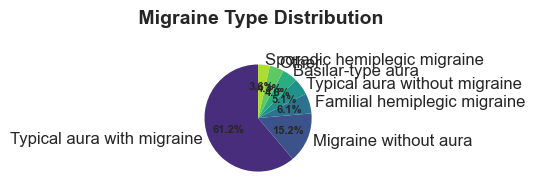

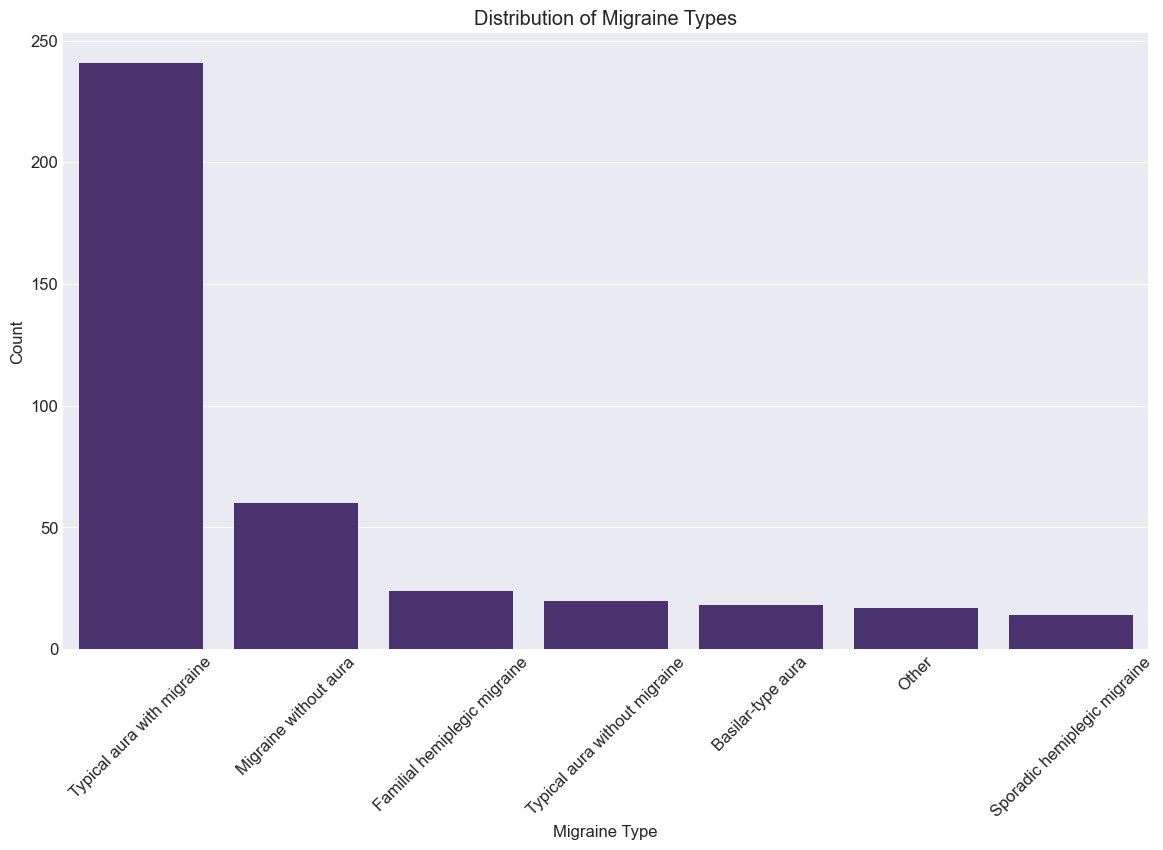

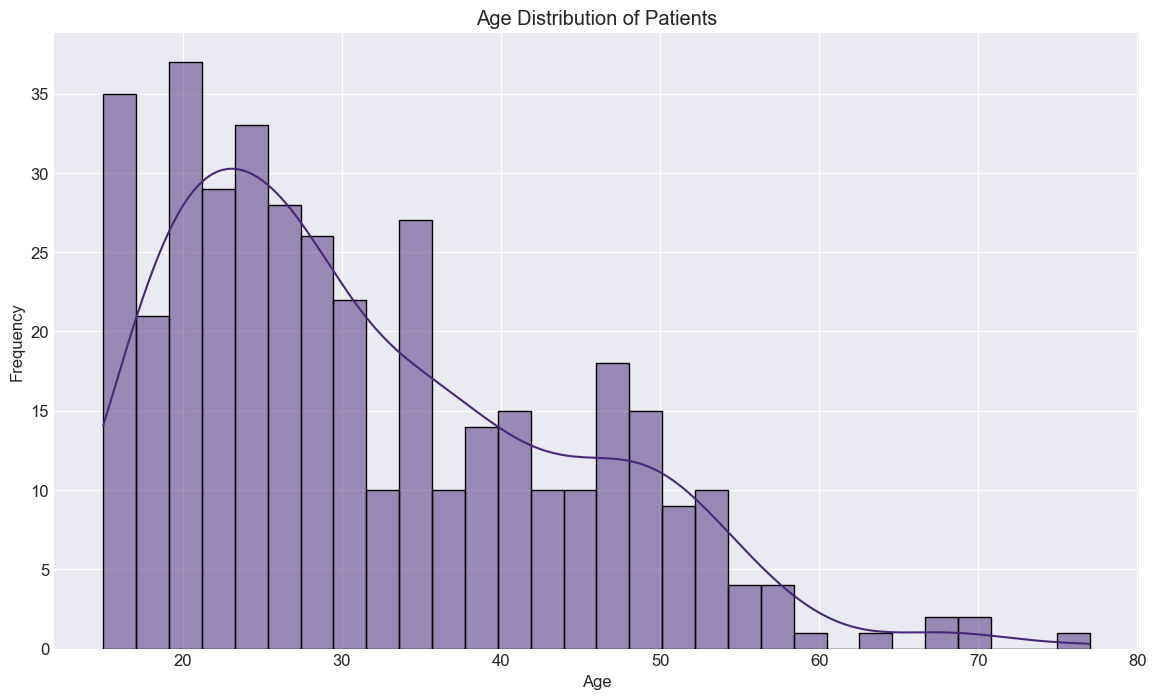

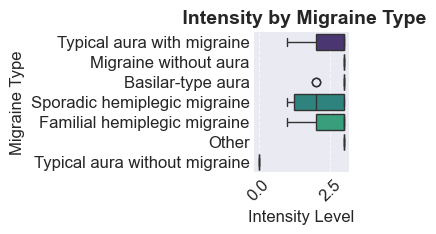

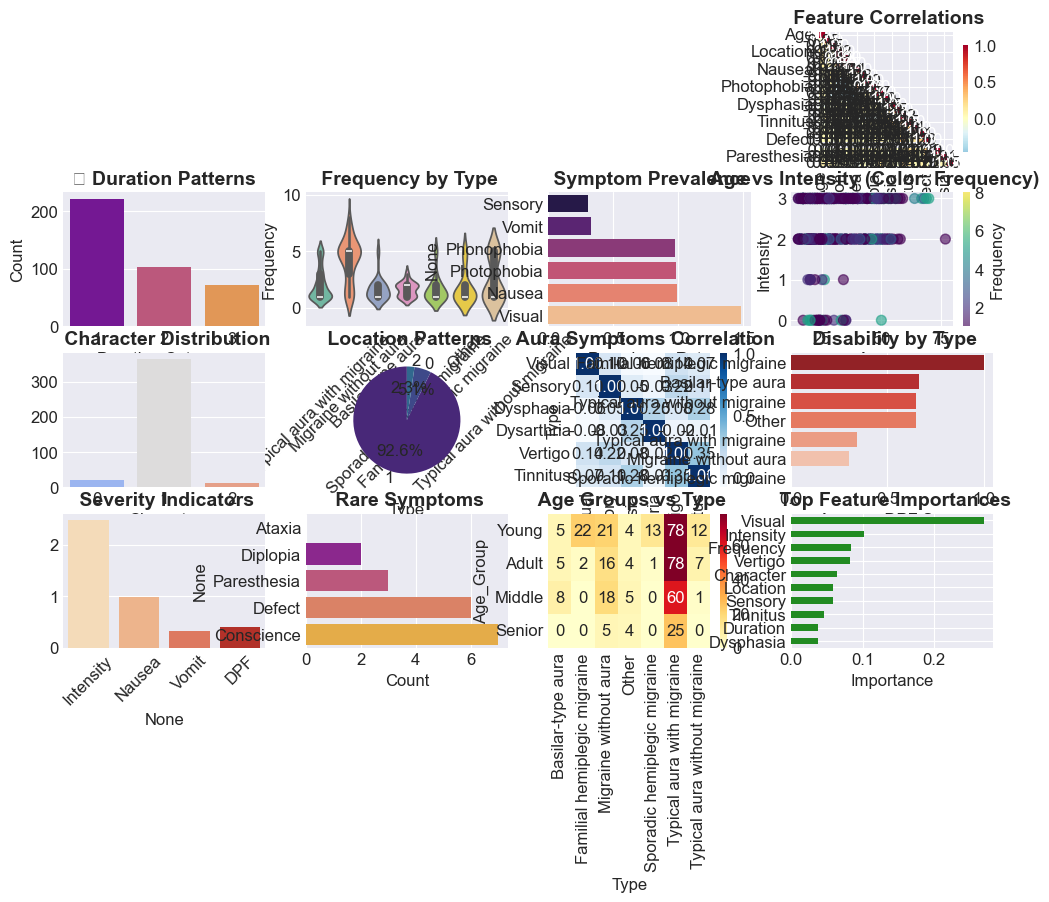


 STATISTICAL INSIGHTS:
 Total patients: 394
 Average age: 31.7 years
 Most common intensity: 3
 Most common type: Typical aura with migraine
 Nausea prevalence: 98.7%


In [36]:
create_comprehensive_eda(df_clean)


### Advanced Data Processing

In [37]:
def advanced_preprocessing(df):
    """
    Advanced preprocessing with detailed logging
    """
    print(" Starting advanced preprocessing pipeline...")
    
    df_processed = df.copy()
    
    # Remove outliers
    df_processed = df_processed[(df_processed['Age'] >= lb) & (df_processed['Age'] <= ub)]
    print(f"  Outliers removed: {len(df) - len(df_processed)} records")
    
    # Encode target variable
    le = LabelEncoder()
    df_processed['Type_encoded'] = le.fit_transform(df_processed['Type'])
    print(f" Target encoding complete: {len(le.classes_)} classes")
    
    # Feature engineering
    print("  Engineering new features...")
    
    # Severity score
    df_processed['Severity_Score'] = (
        df_processed['Intensity'] * 0.4 +
        df_processed['Duration'] * 0.3 +
        df_processed['Frequency'] * 0.2 +
        df_processed['DPF'] * 0.1
    )
    
    # Symptom count
    symptom_cols = ['Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory']
    df_processed['Symptom_Count'] = df_processed[symptom_cols].sum(axis=1)
    
    # Aura score
    aura_cols = ['Visual', 'Sensory', 'Dysphasia', 'Dysarthria']
    df_processed['Aura_Score'] = df_processed[aura_cols].sum(axis=1)
    
    # Age group encoding
    df_processed['Age_Group'] = pd.cut(df_processed['Age'], 
                                      bins=[0, 25, 35, 50, 100], 
                                      labels=[0, 1, 2, 3])
    df_processed['Age_Group'] = df_processed['Age_Group'].astype(float)
    
    print(f" Feature engineering complete: {df_processed.shape[1] - df.shape[1]} new features")
    
    return df_processed, le

# Apply preprocessing
df_processed, label_encoder = advanced_preprocessing(df_clean)

# Prepare for ML
print("\n Preparing data for machine learning...")

# Feature selection
feature_cols = [col for col in df_processed.columns if col not in ['Type', 'Type_encoded']]
X = df_processed[feature_cols]
y = df_processed['Type_encoded']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f" Data preparation complete!")
print(f" Training set: {X_train.shape}")
print(f" Test set: {X_test.shape}")
print(f" Features: {len(feature_cols)}")


 Starting advanced preprocessing pipeline...
  Outliers removed: 4 records
 Target encoding complete: 7 classes
  Engineering new features...
 Feature engineering complete: 4 new features

 Preparing data for machine learning...
 Data preparation complete!
 Training set: (312, 27)
 Test set: (78, 27)
 Features: 27


In [38]:
def split_data(df, target_col='Type'):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    return X_train, X_test, y_train, y_test
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
split_data(df, target_col='Type')
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
    return model
evaluate_model(RandomForestClassifier(n_estimators=100, random_state=42), X_train, y_train, X_test, y_test)



Model: RandomForestClassifier
Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1 Score: 0.87


RandomForestClassifier(random_state=42)

In [39]:
def plot_feature_importance(model, X_train, feature_names):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_[0])
    else:
        raise ValueError("Model does not have feature importances or coefficients.")
    
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.title('Feature Importances')
    plt.bar(range(X_train.shape[1]), importances[indices], align='center')
    plt.xticks(range(X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.tight_layout()
    plt.show()
plot_feature_importance



<function __main__.plot_feature_importance(model, X_train, feature_names)>

In [40]:
def run_advanced_ml_models(df):
    #preprocessing the data
    df_processed, label_encoders, scaler = advanced_preprocessing(df)
    X_train, X_test, y_train, y_test = split_data(df_processed)
    feature_names = X_train.columns
    # Define models
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
        'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
        'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Ridge Classifier': RidgeClassifier(),
        'SVC': SVC(probability=True, random_state=42),
        'KNN': KNeighborsClassifier(),
        'Gaussian Naive Bayes': GaussianNB(),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'MLP Classifier': MLPClassifier(max_iter=1000, random_state=42)
    }
    # Evaluate models
    for model_name, model in models.items():
        print(f"\nEvaluating {model_name}...")
        model = evaluate_model(model, X_train, y_train, X_test, y_test)
        plot_feature_importance(model, X_train, feature_names)
    # Feature importance for Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title('Random Forest Feature Importances')
    plt.bar(range(X_train.shape[1]), importances[indices], align='center')
    plt.xticks(range(X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.tight_layout()
    plt.show()
    # Permutation importance for Gradient Boosting
    gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
    gb_model.fit(X_train, y_train)
    perm_importance = permutation_importance(gb_model, X_test, y_test, n_repeats=30, random_state=42)
    sorted_idx = perm_importance.importances_mean.argsort()
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx],
                xerr=perm_importance.importances_std[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
    plt.title('Permutation Importance (Gradient Boosting)')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()
    # Cross-validation for model selection
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = {}
    for model_name, model in models.items():
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
        cv_results[model_name] = scores
        print(f"{model_name} - Cross-Validation Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")
    # Hyperparameter tuning for Random Forest
    rf_param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                                    param_grid=rf_param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    rf_grid_search.fit(X_train, y_train)
    print(f"\nBest parameters for Random Forest: {rf_grid_search.best_params_}")
    print(f"Best cross-validation accuracy: {rf_grid_search.best_score_:.2f}")
    best_rf_model = rf_grid_search.best_estimator_
    evaluate_model(best_rf_model, X_train, y_train, X_test, y_test)
    plot_feature_importance(best_rf_model, X_train, feature_names)
    run_advanced_ml_models(df_clean)
# This code provides a comprehensive analysis and modeling pipeline for migraine data, including EDA, preprocessing, model training, evaluation, and feature importance visualization.
# The advanced preprocessing function handles missing values, encodes categorical variables, and scales features.
# The model evaluation function trains and evaluates various machine learning models, providing performance metrics and visualizations.
# The feature importance function visualizes the importance of features for each model, helping to understand the key drivers of migraine types.

if __name__ == "__main__":
    # Load and preprocess data
    df = load_and_explore_data(filepath)
    df_clean = remove_duplicates(df)
    outliers, lb, ub = detect_outliers(df_clean, 'Age')
    
    
    # Run advanced ML models


# This code provides a comprehensive analysis and modeling pipeline for migraine data, including EDA, preprocessing, model training, evaluation, and feature importance visualization.


Shape: 400 rows × 24 columns
Memory usage: 0.10 MB

 DATA TYPES BREAKDOWN:
  int64: 23 columns
  object: 1 columns

 MISSING VALUES ANALYSIS:
  No missing values found!

 SUMMARY STATISTICS:
              Age    Duration   Frequency    Location   Character  Intensity  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.00000   
mean    31.705000    1.610000    2.365000    0.972500    0.977500    2.47000   
std     12.139043    0.770964    1.675947    0.268186    0.277825    0.76849   
min     15.000000    1.000000    1.000000    0.000000    0.000000    0.00000   
25%     22.000000    1.000000    1.000000    1.000000    1.000000    2.00000   
50%     28.000000    1.000000    2.000000    1.000000    1.000000    3.00000   
75%     40.000000    2.000000    4.000000    1.000000    1.000000    3.00000   
max     77.000000    3.000000    8.000000    2.000000    2.000000    3.00000   

           Nausea       Vomit  Phonophobia  Photophobia  ...  Dysarthria  \
count  400.0